In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics


In [3]:
data = pd.read_csv('housing.csv')

In [4]:
pd = data.copy()

In [5]:
pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
print(df.isnull().sum())


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [16]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(
    df['total_bedrooms'].mode()[0]
)

In [17]:
print(df.isnull().sum())


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [28]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [30]:
new_df = df[
    [
        'housing_median_age',
        'total_bedrooms',
        'median_income',
        'median_house_value',
        'rooms_per_household',
        'bedrooms_per_room'
    ]
]


In [31]:
new_df.info()
new_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   housing_median_age   20640 non-null  float64
 1   total_bedrooms       20640 non-null  float64
 2   median_income        20640 non-null  float64
 3   median_house_value   20640 non-null  float64
 4   rooms_per_household  20640 non-null  float64
 5   bedrooms_per_room    20640 non-null  float64
dtypes: float64(6)
memory usage: 967.6 KB


,housing_median_age,total_bedrooms,median_income,median_house_value,rooms_per_household,bedrooms_per_room
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,535.284351,3.870671,206855.816909,5.429000,0.212764
std,12.585558,420.053240,1.899822,115395.615874,2.474173,0.060806
min,1.000000,1.000000,0.499900,14999.000000,0.846154,0.023913
25%,18.000000,292.000000,2.563400,119600.000000,4.440716,0.174983
50%,29.000000,431.000000,3.534800,179700.000000,5.229129,0.202951
75%,37.000000,643.250000,4.743250,264725.000000,6.052381,0.239690
max,52.000000,6445.000000,15.000100,500001.000000,141.909091,1.818182


Housing age has a limited spread and is less likely to be a strong standalone predictor.

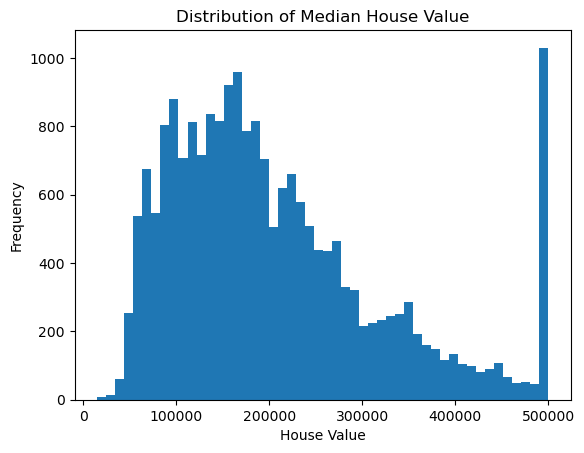

In [32]:
plt.hist(new_df['median_house_value'], bins=50)
plt.xlabel("House Value")
plt.ylabel("Frequency")
plt.title("Distribution of Median House Value")
plt.show()

Most houses are concentrated in the lower to mid price range

A small number of high-priced houses stretch the tail to the right

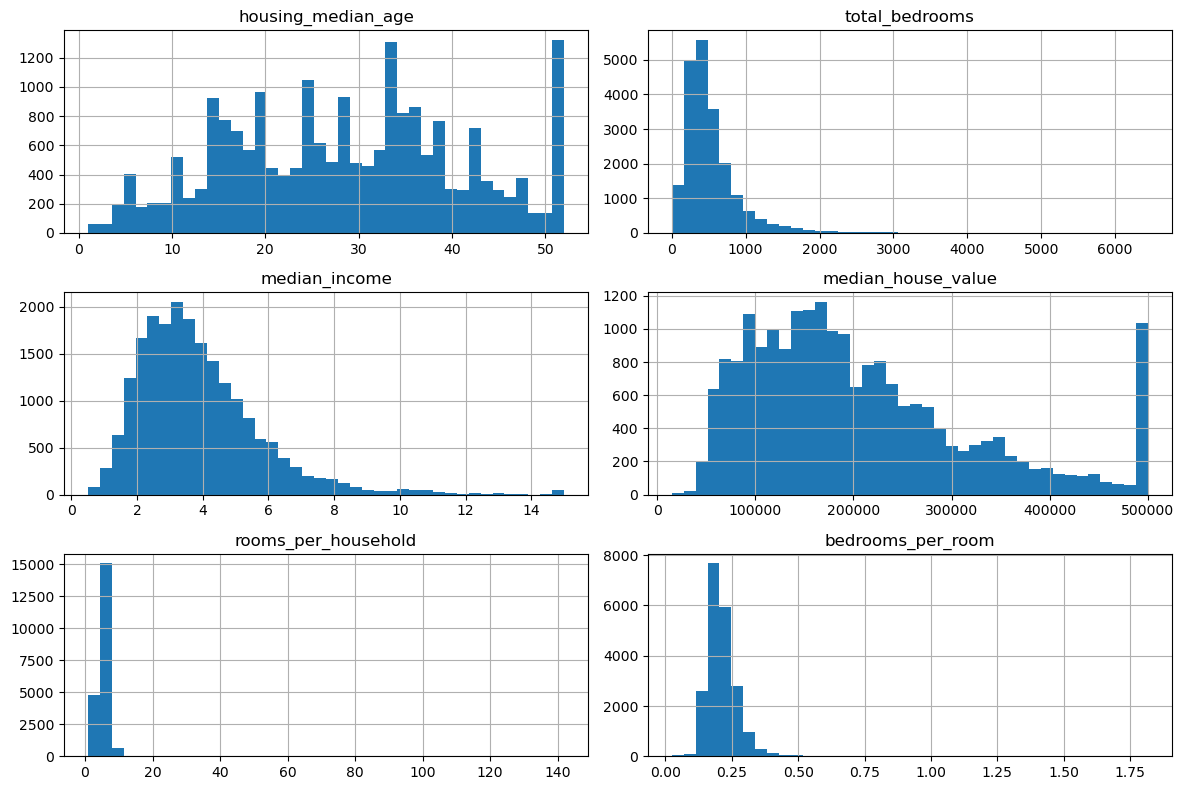

In [33]:
new_df.hist(bins=40, figsize=(12,8))
plt.tight_layout()
plt.show()

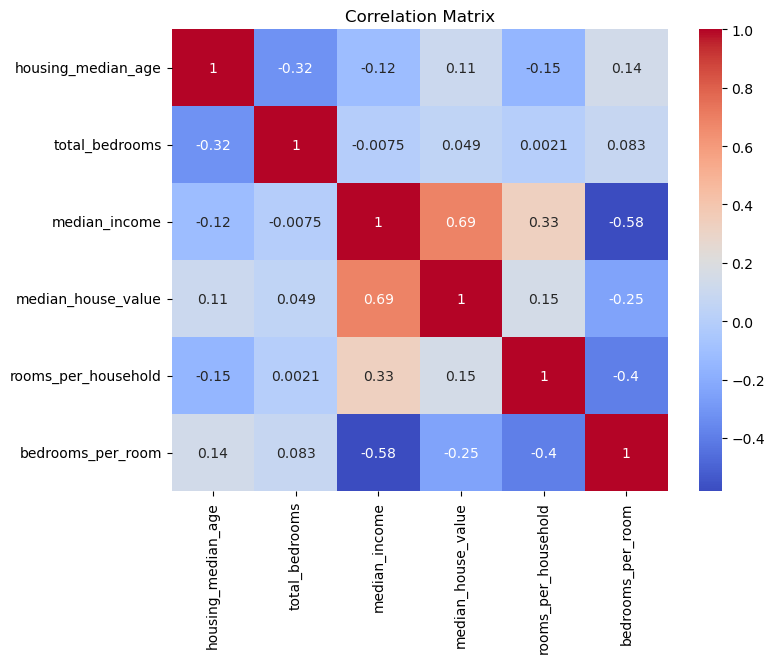

In [34]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Median Income vs Median House Value

-Shows the strongest positive correlation

Median Income vs Bedrooms per Room

-Strong negative correlation (≈ -0.58)

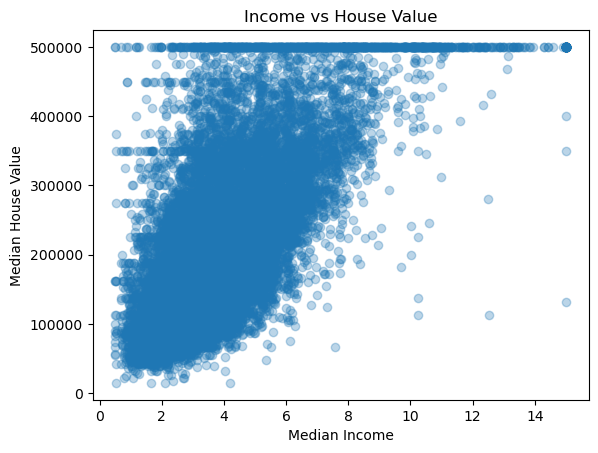

In [35]:
plt.scatter(new_df['median_income'], new_df['median_house_value'], alpha=0.3)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Income vs House Value")
plt.show()


Higher income areas tend to have higher house prices

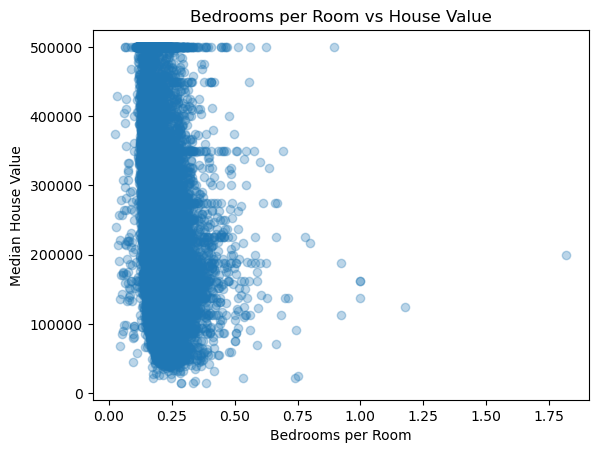

In [36]:
plt.scatter(new_df['bedrooms_per_room'], new_df['median_house_value'], alpha=0.3)
plt.xlabel("Bedrooms per Room")
plt.ylabel("Median House Value")
plt.title("Bedrooms per Room vs House Value")
plt.show()


As income increases, the bedrooms-per-room ratio decreases